In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [23]:
pokemon = pd.read_csv('./pokemon.csv')
print(pokemon.shape) ##No of rows and columns
pokemon.head(10)

(807, 14)


id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   
5   6   charizard              1     1.7    90.5              240   fire   
6   7    squirtle              1     0.5     9.0               63  water   
7   8   wartortle              1     1.0    22.5              142  water   
8   9   blastoise              1     1.6    85.5              239  water   
9  10    caterpie              1     0.3     2.9               39    bug   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65  
5  flying  78      84       78    100             109               85  
6     NaN  44      48       65     43              50               64  
7     NaN  59      63       80     58              65               80  
8     NaN  79      83      100     78              85              105  
9     NaN  45      30       35     45              20               20

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

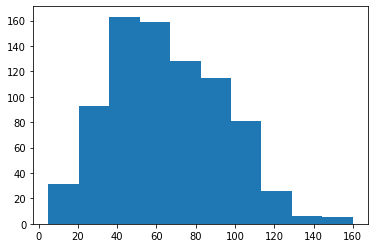

In [24]:
plt.hist(data = pokemon, x = 'speed')

The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasize the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

You can use descriptive statistics (e.g. via df['num_var'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function:

In [29]:
pokemon['speed'].describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

(array([  3.,  15.,  37.,  81., 103., 101., 117.,  80.,  77.,  81.,  58.,
         30.,  13.,   5.,   2.,   4.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160]),
 <a list of 16 Patch objects>)

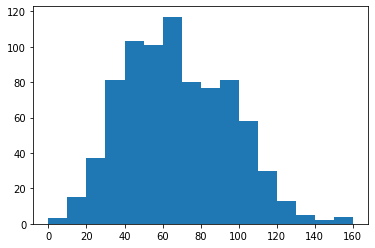

In [22]:
bin_edges = np.arange(0, pokemon['speed'].max()+10, 10)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+10" (the bin width). That is because arange will only return values that are strictly less than the upper limit. Adding in "+1" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  4.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  3.,
         0.,  0.,  0., 33.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  5.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 26.,  0.,  0.,
         0.,  6.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
         1.,  0.,  0.,  0., 36.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  8.,  0.,  0.,  0.,  3.,  0.

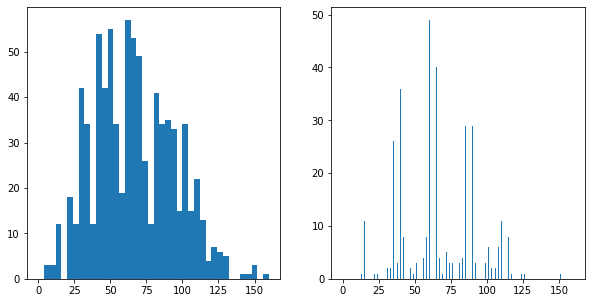

In [30]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

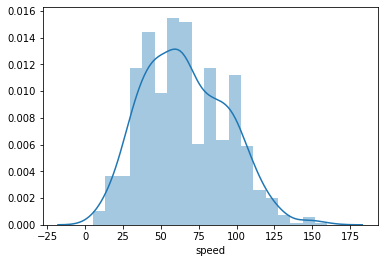

In [31]:
##Alternative Approach
##The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate
##plotting functions.

sb.distplot(pokemon['speed'])

When we specify the data to be plotted, note that the first argument must be the Series or array with the points to be plotted. This is in contrast to our ability to specify a data source and column as separate arguments, like we've seen with and countplot and hist.

The distplot function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. If you want to learn more about KDEs, check out the extra page at the end of the lesson.

Despite the fact that the default bin-selection formula used by distplot might be better than the choice of ten bins that .hist uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

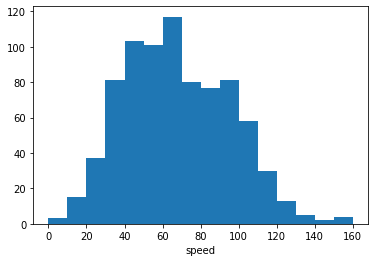

In [33]:
bin_edges = np.arange(0, pokemon['speed'].max()+10, 10)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.


The result of the code above is exactly like the histogram above with bin width of 10. The units of the vertical axis are also back in terms of counts.

In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by distplot, then you might be better off with just using Matplotlib's hist function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is to explicitly set up the Figure and Axes like this:

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

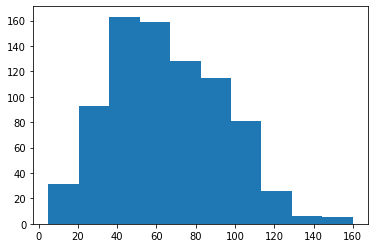

In [35]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = pokemon, x = 'speed')

figure() creates a new Figure object, a reference to which has been stored in the variable fig. One of the Figure methods is .add_axes(), which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes: the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable ax. Finally, we use the Axes method .hist() just like we did before with plt.hist().

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

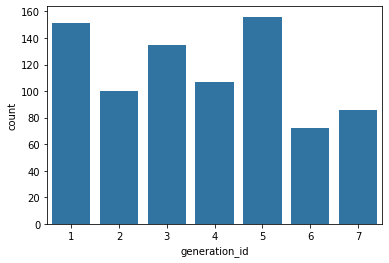

In [37]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)

In the above two cases, there was no purpose to explicitly go through the Figure and Axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a Figure or Axes, and they'll automatically target the most recent Figure or Axes worked with. As an example of this, let's review in detail how subplot() was used on the Histograms page:

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  4.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  3.,
         0.,  0.,  0., 33.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  5.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 26.,  0.,  0.,
         0.,  6.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
         1.,  0.,  0.,  0., 36.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  8.,  0.,  0.,  0.,  3.,  0.

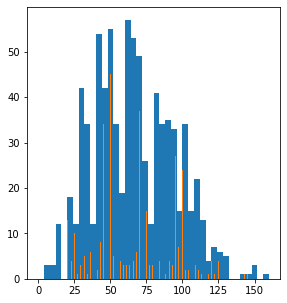

In [40]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

# example of somewhat too-small bin size
##plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

If you want to plot a discrete quantitative variable, it is possible to select either a histogram or a bar chart to depict the data.

The histogram is the most immediate choice since the data is numeric, but there's one particular consideration to make regarding the bin edges. Since data points fall on set values, it can help to reduce ambiguity by putting bin edges between the actual values taken by the data. Your readers may not know that values on bin edges end up in the bin to their right, so this can help remove potential confusion when they interpret the plot. Compare the two visualizations of 100 random die rolls below (in die_rolls), with bin edges _on_ the values in the left subplot, and bin edges in between values in the right subplot.

NameError: name 'die_rolls' is not defined

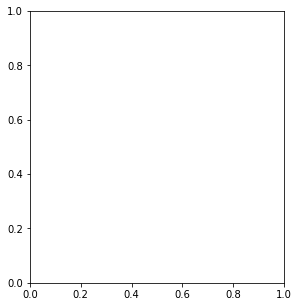

In [45]:
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

You'll notice for the left histogram, in a deviation from the examples that have come before, I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1. Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

Alternatively to the histogram, consider if a bar chart with non-connected bins might serve your purposes better. The plot below takes the code from before, but adds the "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.

In [46]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1))

NameError: name 'die_rolls' is not defined

With "rwidth" set to 0.7, the bars will take up 70% of the space allocated by each bin, with 30% of the space left empty. This changes the default display of the histogram (which you could think of as "rwidth = 1") into a bar chart.

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value. As another caution, it might be tempting to use seaborn's countplot function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. (For example, if the unique values were {1, 2, 4, 5}, missing 3, countplot would only plot four bars, with the bars for 2 and 4 right next to one another.) Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.